# XÂY DỰNG MODEL DỰ ĐOÁN 'REVENUE' DỰA TRÊN 'MEDIAN_INCOME'

ĐỌC DỮ LIỆU, TIỀN XỬ LÝ DỮ LIỆU

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('location_rev.csv')
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3,30527.57,1407,3302,12
1,38628.37,3,30185.49,1025,4422,11
2,39715.16,1,32182.24,1498,3260,12
3,35593.30,5,29728.65,2340,4325,10
4,35128.18,4,30691.17,847,3774,11


In [3]:
df.describe()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38433.469330,3.397000,31360.668500,1597.200000,3351.199000,11.041000
std,11665.825242,1.016082,3943.278358,496.874663,975.664263,3.034885
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30277.897500,3.000000,28792.592500,1253.000000,2689.250000,9.000000
50%,38323.095000,3.000000,31134.555000,1605.000000,3353.000000,11.000000
75%,45894.670000,4.000000,34050.992500,1925.250000,4017.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


In [4]:
df.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


#CORRELATION giữa median_income và revenue=0.6

TRỰC QUAN HÓA BAN ĐẦU

<AxesSubplot:xlabel='median_income', ylabel='revenue'>

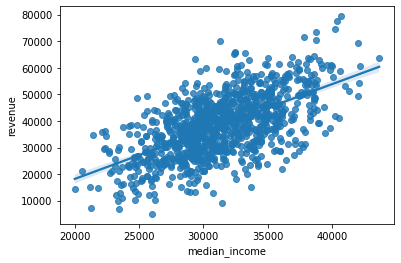

In [5]:
sns.regplot(data=df,x='median_income',y='revenue')

C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


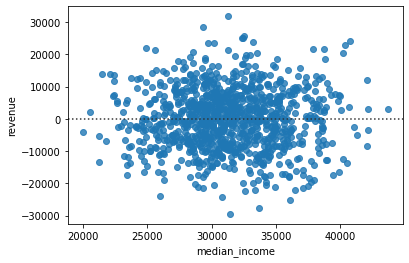

In [15]:
sns.residplot(df.median_income, df.revenue)
plt.show()

In [1]:
#NHẬN XÉT: Phần dư khá cao và không được trải đều trên trục x, có theer có một mô hình phi tuyến phù hợp với dữ liệu này.

CHUẨN BỊ DỮ LIỆU TRAINING DATA/ TEST DATA

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X1=df[['median_income']]
y1=df['revenue']

In [18]:
X1_train, X1_test, y1_train, y1_test=train_test_split(X1,y1,random_state=42)
#Nếu bỏ random_state thì mỗi lần chạy sẽ có train khác nhau. Nếu chạy nhiều lần , dù lấy ngẫu nhiên nhưng giống nhau ở các lần chạy thì truyền vào bộ random_state

TẠO ĐỐI TƯỢNG LINEAR REGRESSION. HUẤN LUYỆN MODEL

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model=LinearRegression()
model.fit(X1_train,y1_train)

LinearRegression()

In [21]:
intercept=model.intercept_
slope=model.coef_[0]
print(intercept,slope)

-17944.393212607967 1.8044776691444901


DỰ ĐOÁN y1_pred TỪ X1_test

In [22]:
y1_pred=model.predict(X1_test)

XÁC ĐỊNH GIÁ TRỊ INTERCEPT VÀ SLOPE

In [23]:
intercept=model.intercept_
slope=model.coef_[0]
print(intercept,slope)

-17944.393212607967 1.8044776691444901


#REVENUE=1.8045*MEDIAN_INCOME-17944.39

ĐÁNH GIÁ MODEL

R^2 CHO TOÀN BỘ DỮ LIỆU

In [24]:
model.score(X1,y1)

0.3618738533973396

R^2 KHI TRAIN

In [25]:
model.score(X1_train,y1_train)

0.37376263809946475

R^2 KHI TEST

In [26]:
model.score(X1_test,y1_test)

0.3246804918433005

In [6]:
#nhận xét: under fiting

KIỂM TRA THÊM CÁC ĐẠI LƯỢNG KHÁC #mse, mae

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
mse=mean_squared_error(y1_pred, y1_test)
print(mse)

90952579.47704405


In [31]:
mae=mean_absolute_error(y1_pred, y1_test)
print(mae)

7751.936386800821


TRỰC QUAN HÓA DỮ LIỆU

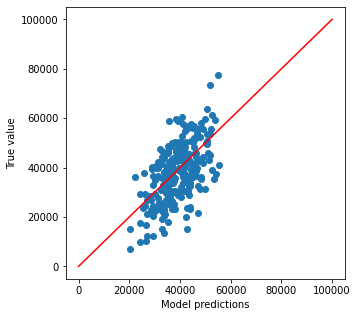

In [37]:
plt.figure(figsize=(5,5))
plt.scatter(model.predict(X1_test),y1_test)
plt.xlabel('Model predictions')
plt.ylabel('True value')
plt.plot([0,100000],[0,100000], color='r')
plt.show()

# MULTIPLE LINEAR REGRESSION

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
X=df[['num_competitors', 
   'median_income',
   'num_loyalty_members',
    'population_density',
    'location_age'
   ]]
y=df['revenue']

In [45]:
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=100)

In [47]:
from sklearn.linear_model import LinearRegression

In [52]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
print(model.intercept_)
print(model.coef_)

-51068.63644236374
[-2.14765128e+03  1.71903196e+00  3.50665069e+00  4.31777912e+00
  2.06703103e+03]


In [55]:
y_pred=model.predict(X_test)

In [56]:
model.score(X,y)

0.8132062485664423

In [57]:
model.score(X_train,y_train)

0.8107126447396588

In [58]:
model.score(X_test,y_test)

0.8210733500078612

In [60]:
mse=mean_squared_error(y_pred,y_test)
print(mse)

23181637.891943764


In [61]:
mae=mean_absolute_error(y_pred,y_test)
print(mae)

3930.405229016759


In [62]:
#Cần dư báo một giá trị mới: thế số vô hàm đã tìm được

In [70]:
X_new=pd.DataFrame({
    'num_competitors': [3], 
   'median_income': [3000],
   'num_loyalty_members':[1200],
    'population_density': [2000],
    'location_age':[10]
})

In [71]:
y_new=model.predict(X_new)
print(y_new)

[-18840.64501295]


In [72]:
X.mean()

num_competitors            3.3970
median_income          31360.6685
num_loyalty_members     1597.2000
population_density      3351.1990
location_age              11.0410
dtype: float64

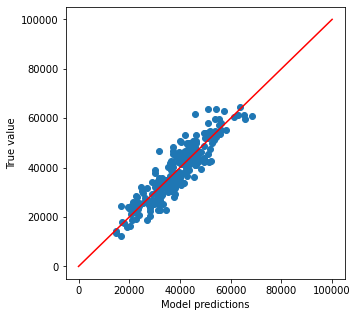

In [74]:
plt.figure(figsize=(5,5))
plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model predictions')
plt.ylabel('True value')
plt.plot([0,100000],[0,100000], color='r')
plt.show()

In [75]:
#Nhận xét: dữ liệu gần hơn với đường màu đỏ,phân bố sát và tốt hơn.

C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

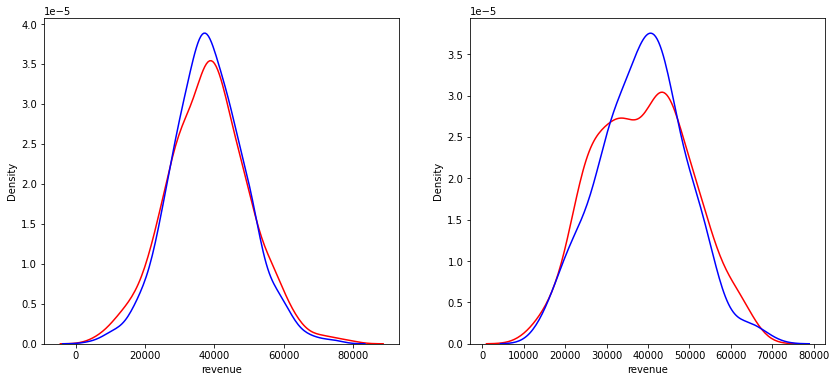

In [77]:
#dùng distribution plot để trực quan hóa 
plt.figure(figsize=(14,6))
#tập train
plt.subplot(1,2,1)
ax1=sns.distplot(y_train,hist=False,color='r',label='Actual Train Values')
sns.distplot(model.predict(X_train),hist=False,color='b', label='Predicted Train Values',ax=ax1)
#tập test
plt.subplot(1,2,2)
ax2=sns.distplot(y_test,hist=False,color='r',label='Actual Test Values')
sns.distplot(model.predict(X_test),hist=False,color='b', label='Predicted Test Values',ax=ax2)
plt.show()

In [ ]:
#có độ sai biết giữa train và test, nhưng hai plot gần giống nhau. 


In [78]:
from scipy.stats.stats import pearsonr

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9112\4005289447.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [79]:
pearsonr(model.predict(X_test),y_test)

PearsonRResult(statistic=0.9061597827907564, pvalue=1.1552714895195607e-94)

LỰA CHỌN THUỘC TÍNH

In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [81]:
# Apply SelectKBest class to extract all best features
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [82]:
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# Sorting in descending order 
featureScores.sort_values("Score", ascending = False, inplace = True)
print(featureScores)  

                 Specs       Score
1        median_income  566.922357
4         location_age  439.125397
3   population_density  107.360798
2  num_loyalty_members   30.949544
0      num_competitors   25.117590


In [83]:
# Correlation Matrix with Heatmap
corrmat = df.corr()

In [84]:
corrmat

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


In [85]:
top_corr_features = corrmat.index

In [86]:
import matplotlib
matplotlib.__version__

'3.5.3'

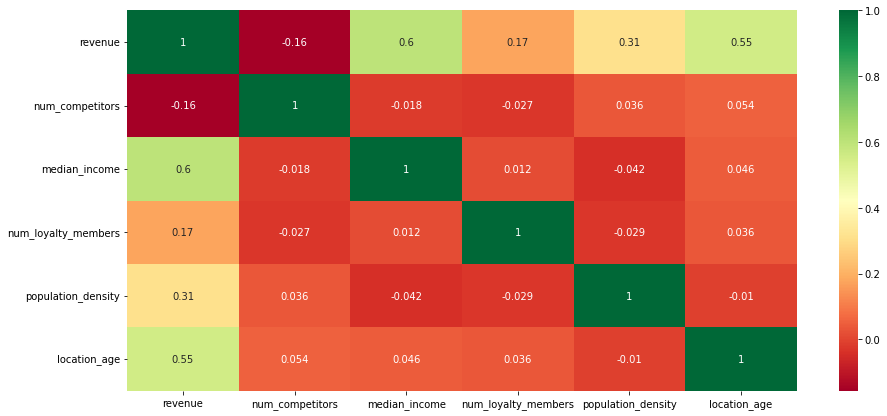

In [87]:
plt.figure(figsize=(15,7))
# plot heat map
g=sns.heatmap(df[top_corr_features].corr(),cmap="RdYlGn", annot=True) # annot=True: nếu muốn in cả giá trị
plt.show()

In [88]:
# 3 thuộc tính có score cao nhất
X2 = df[['median_income', 'population_density', 'location_age']]
y2 = df['revenue']

In [89]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 100)

In [90]:
model2 = LinearRegression()
model2.fit(X2_train,y2_train)

LinearRegression()

In [91]:
model2.score(X2, y2)

0.7552028859956076

In [92]:
model2.score(X2_train, y2_train)

0.7526411491478369

In [93]:
model2.score(X2_test, y2_test)

0.7632552854044201

In [94]:
mean_squared_error(model2.predict(X2_test), y2_test)

30672514.389709026

In [95]:
mean_absolute_error(model2.predict(X2_test), y2_test)

4358.312766077768